<a href="https://colab.research.google.com/github/XiaobingDean/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import sys
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.utils
from torchvision import models
import torchvision.datasets as dsets
import torchvision.transforms as transforms


In [ ]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])
train_dataset = mnist.MNIST('./data', train=True, transform=transform, target_transform=None, download=True)
test_dataset = mnist.MNIST('./data', train=False, transform=transform, target_transform=None, download=False)
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

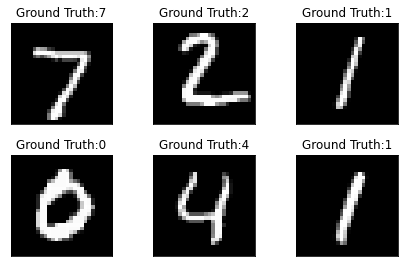

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
examples = enumerate(test_loader)
batch_idx,(example_data,example_targets) = next(examples)
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0],cmap='gray',interpolation='none')
    plt.title("Ground Truth:{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
model = models.inception_v3(pretrained=True).to(device)

NameError: ignored

In [ ]:
model = CNN(28*28,300,100,10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=lr,momentum=momentum)

In [ ]:
losses = []
acces = []

eval_losses = []
eval_acces = []

for epoch in range(nums_epoches):

    train_loss = 0
    train_acc = 0

    model.train()

    if epoch%5 == 0:
        optimizer.param_groups[0]['lr'] *= 0.1
    for img,label in train_loader:

        img = img.view(img.size(0),-1)

        out = model(img)

        loss = criterion(out,label)

        optimizer.zero_grad()
        loss.backward()
 
        optimizer.step()

        train_loss += loss.item()

        _,pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct/img.shape[0]
        train_acc += acc
    losses.append(train_loss/len(train_loader))
    acces.append(train_acc/len(train_loader))
    
    eval_loss = 0
    eval_acc = 0
    model.eval()
    for img,label in test_loader:
        img = img.view(img.size(0),-1)
        
        out = model(img)
        loss = criterion(out,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        eval_loss += loss.item()
        
        _,pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct/img.shape[0]
        eval_acc += acc
    eval_losses.append(eval_loss/len(test_loader))
    eval_acces.append(eval_acc/len(test_loader))

    print('epoch:{},Train Loss:{:.4f},Train Acc:{:.4f},Test Loss:{:.4f},Test Acc:{:.4f}'
             .format(epoch,train_loss/len(train_loader),train_acc/len(train_loader),
                    eval_loss/len(test_loader),eval_acc/len(test_loader)))

epoch:0,Train Loss:0.3587,Train Acc:0.9147,Test Loss:0.1533,Test Acc:0.9539
epoch:1,Train Loss:0.1261,Train Acc:0.9658,Test Loss:0.1103,Test Acc:0.9680
epoch:2,Train Loss:0.0893,Train Acc:0.9754,Test Loss:0.0859,Test Acc:0.9750
epoch:3,Train Loss:0.0679,Train Acc:0.9816,Test Loss:0.0716,Test Acc:0.9775
epoch:4,Train Loss:0.0526,Train Acc:0.9863,Test Loss:0.0898,Test Acc:0.9743
epoch:5,Train Loss:0.0412,Train Acc:0.9895,Test Loss:0.0309,Test Acc:0.9917
epoch:6,Train Loss:0.0355,Train Acc:0.9914,Test Loss:0.0300,Test Acc:0.9918
epoch:7,Train Loss:0.0350,Train Acc:0.9918,Test Loss:0.0297,Test Acc:0.9922
epoch:8,Train Loss:0.0331,Train Acc:0.9927,Test Loss:0.0289,Test Acc:0.9924
epoch:9,Train Loss:0.0315,Train Acc:0.9930,Test Loss:0.0278,Test Acc:0.9929
epoch:10,Train Loss:0.0303,Train Acc:0.9935,Test Loss:0.0265,Test Acc:0.9935
epoch:11,Train Loss:0.0301,Train Acc:0.9936,Test Loss:0.0278,Test Acc:0.9929
epoch:12,Train Loss:0.0299,Train Acc:0.9939,Test Loss:0.0273,Test Acc:0.9930
epoch:13,

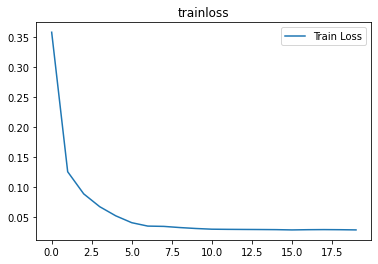

In [ ]:
plt.title('trainloss')
plt.plot(np.arange(len(losses)),losses)
plt.legend(['Train Loss'],loc='upper right')

In [ ]:
def pgd_attack(model, images, labels, eps=0.3, alpha=2/255, iters=40) :
    images = img.view(img.size(0),-1)
    out = model(img)
    loss = criterion(out,label)
    
        
    ori_images = images.data
        
    for i in range(iters) :    
        images.requires_grad = True
        outputs = model(images)

        model.zero_grad()
        
        loss.backward()

        adv_images = images + alpha*images.grad.sign()
        eta = torch.clamp(adv_images - ori_images, min=-eps, max=eps)
        images = torch.clamp(ori_images + eta, min=0, max=1).detach_()
            
    return images

In [ ]:
model.eval()

correct = 0
total = 0

for images, labels in test_loader:
    
    images = pgd_attack(model, images, labels)
    labels = labels.to(device)
    outputs = model(images)
    
    _, pre = torch.max(outputs.data, 1)

    total += 1
    correct += (pre == labels).sum()
    
    imshow(torchvision.utils.make_grid(images.cpu().data, normalize=True), [normal_data.classes[i] for i in pre])

AttributeError: ignored